In [1]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
import networkx as nx
import numpy as np
import sys
sys.path.insert(1, '/home/mauricio/code/mcr')

# Important nodes (measure of centrality)
* Which nodes are important?
    * Degree centrality "centralidade de grau"
    * Betweenness centrality "Centralidade intermediária"

# Degree centrality (Centralidade de Grau)
* Definition:

$$\frac{Number\ of\ Neighbors\ I\ Have}{Number\ of\ Neighbors\ I\ Could\ Possibly\ Have}$$

There are two scenarios possible here:
* If self-loops are allowed, such as in a network mapping of all bike trips in a bike sharing system, then the number of neighbors that I could possibly have is every single node in the graph, including myself.
* On the other hand, if self-loops are not allowed, such as in the Twitter social network where, by definition, my account cannot follow itself, then the number of neighbors I could possibly have is every other node in the graph, excluding myself.

Example of node with high degree centrality:
* Twitter broadcasters
* Airport transportation hubs
* Disease super-spreaders

## Degree: Number of neighbors

In [2]:
G = nx.Graph()
G.add_nodes_from(range(1,10))
G.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9))

In [3]:
# add edges
edges = [(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9)]
G.add_edges_from(edges)
G.add_edge(9,9)
G.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (9, 9)])

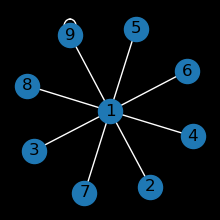

In [4]:
fig = plt.figure(figsize=(2,2))
nx.draw(G, with_labels=True, edge_color='white')
fig.set_facecolor('black')

In [5]:
list(G.neighbors(1))

[2, 3, 4, 5, 6, 7, 8, 9]

In [6]:
list(G.neighbors(8))

[1]

In [7]:
list(G.neighbors(9))

[1, 9]

In [8]:
try:
    print(list(G.neighbors(10)))
except Exception as e:
    print(f'{e.__class__.__name__}: {e}')

NetworkXError: The node 10 is not in the graph.


## Degree for each node

In [9]:
degrees = [len(list(G.neighbors(n))) for n in G.nodes()]
degrees

[8, 1, 1, 1, 1, 1, 1, 1, 2]

## Degree distribuiton
The number of neighbors that a node has is called its "degree", and it's possible to compute the degree distribution across the entire graph.

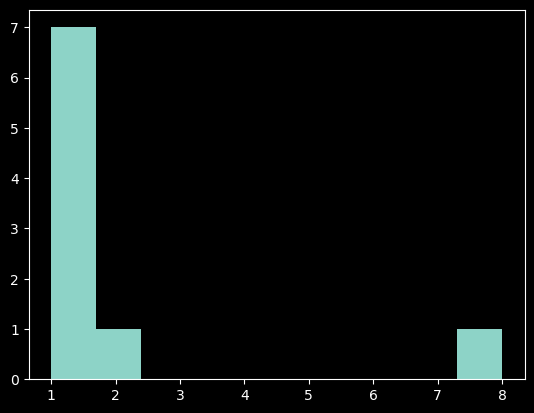

In [10]:
_=plt.hist(degrees)

## Find nodes with $m$ neigbors

In [11]:
from mcr.nx import nodes_with_m_neighbors
print(nodes_with_m_neighbors(G, 2))

{9}


## Degree centrality function

In [12]:
deg_cent = nx.degree_centrality(G)
deg_cent

{1: 1.0,
 2: 0.125,
 3: 0.125,
 4: 0.125,
 5: 0.125,
 6: 0.125,
 7: 0.125,
 8: 0.125,
 9: 0.375}

## Degree centrality distribution

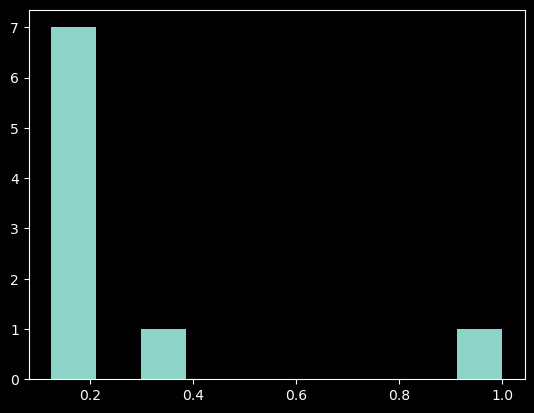

In [13]:
_=plt.hist(list(deg_cent.values()))

## Degree centrality distribution of a twitter network

In [14]:
import pickle
with open('ego-twitter.p', 'rb') as f:
    T = pickle.load(f)
len(T.nodes()), len(T.edges())

(23369, 33142)

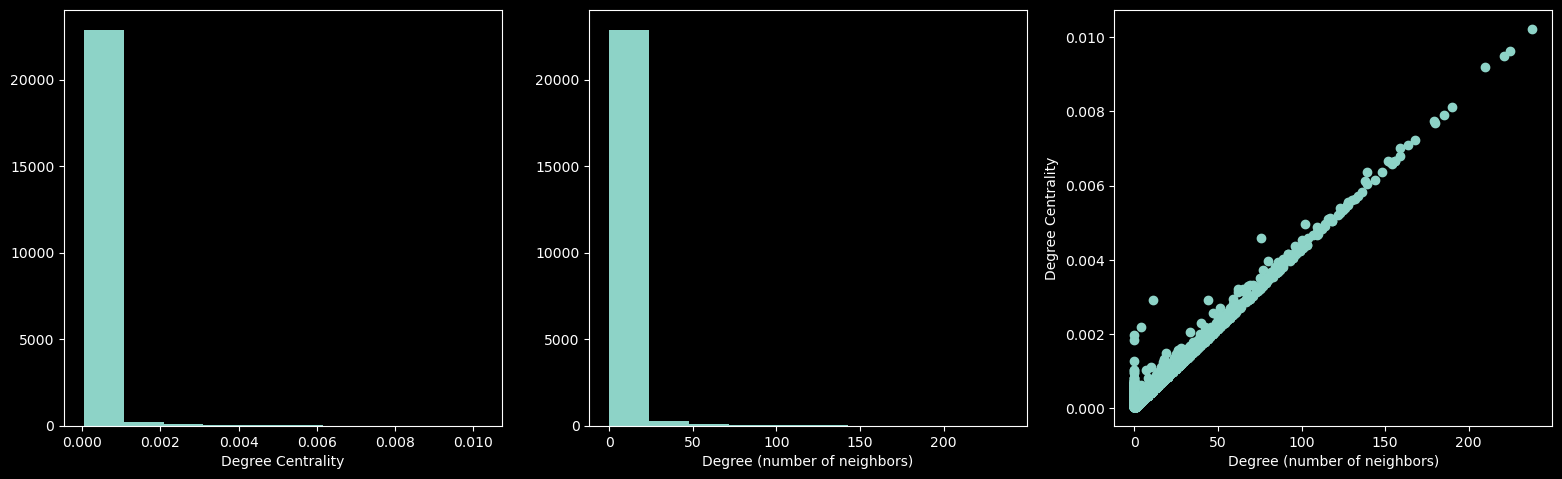

In [15]:
from mcr.nx import plot_degree_centrality
plot_degree_centrality(T)

> Given the similarities of their histograms, it should not surprise you to see a correlation between the centrality distribution and the degree distribution.

# Graph algorithms

## Finding paths
* Pathfinding is important for
    * Optimization: e.g. shortest transport paths
    * Modelling: e.g. disease spread, information passing
* Algorithm: **Breadth-first search (BFS)**
    * Shortest path between two nodes

## Finding path implementing BFS algorithm

In [16]:
from mcr.nx import path_exists

In [17]:
path_exists(T, 1, 563)

True

In [18]:
path_exists(T, 3, 563)

False

# Betweenness centrality (Centralidade intermediária)

## All shortest paths
* Set of paths such that,
* Each path is shortest path between a given pair of nodes
* Done for all node pairs

## Defintion
$$\frac{number\ of\ shortest\ paths\ through\ node}{all\ possible\ shortest\ paths}$$

> Betweenness centrality is defined as the number of shortest paths in a graph that pass through a node divided by the number of shortest paths that exist between every pair of nodes in a graph. This metric captures a different view of importance - in essence, it captures bottleneck nodes in a graph, rather than highly connected nodes

* Application:
    * Bridges between liberal- and conservative-leaning Twitter users
    * Critical information transfer links
    
Where might betweenness centrality useful?
* One example would be individuals that bridge between two communities, say, an individual bridging liberal-leaning and conservative-leaning Twitter users.
* Alternatively, consider the internet, where there are crucial links that bridge two networks of computers. If we removed those crucial nodes in the internet, then information will not flow (or at least not as easily) between subnetworks. 

## A Barbell Graph

`barbell_graph(m1, m2)` returns the Barbell Graph: two complete graphs connected by a path.
* `m1`: Size of the left and right barbells, must be greater than 2.
* `m2`: Length of the path connecting the barbells.

In the mathematical discipline of graph theory, the n-barbell graph is a special type of undirected graph consisting of two non-overlapping n-vertex cliques together with a single edge that has an endpoint in each clique.

In [19]:
G = nx.barbell_graph(m1=5, m2=1)

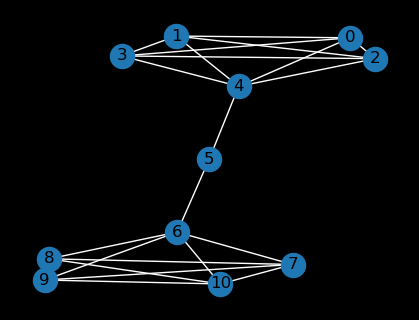

In [20]:
fig = plt.figure(figsize=(4,3))
nx.draw(G, edge_color='white', with_labels=True)
fig.set_facecolor('black')

### Betweenness centrality

In [21]:
bet_cent = nx.betweenness_centrality(G)
bet_cent

{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.5333333333333333,
 6: 0.5333333333333333,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 5: 0.5555555555555556}

You might notice that some of the nodes here have betweenness centrality scores of "0".  
That's because they are located at the ends of the barbell graph, and the nodes within each end are fully connected with one another.  
Therefore, with the exception of the bridge node and the two other nodes it is connected to, there's no shortest path that has to run through any of those nodes to get to other nodes. 

### Betweenness centrality distribuition

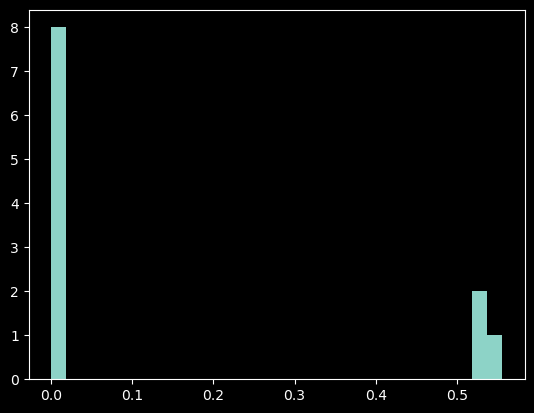

In [22]:
_=plt.hist(bet_cent.values(), bins=30)

## Betweenness centrality on a social network

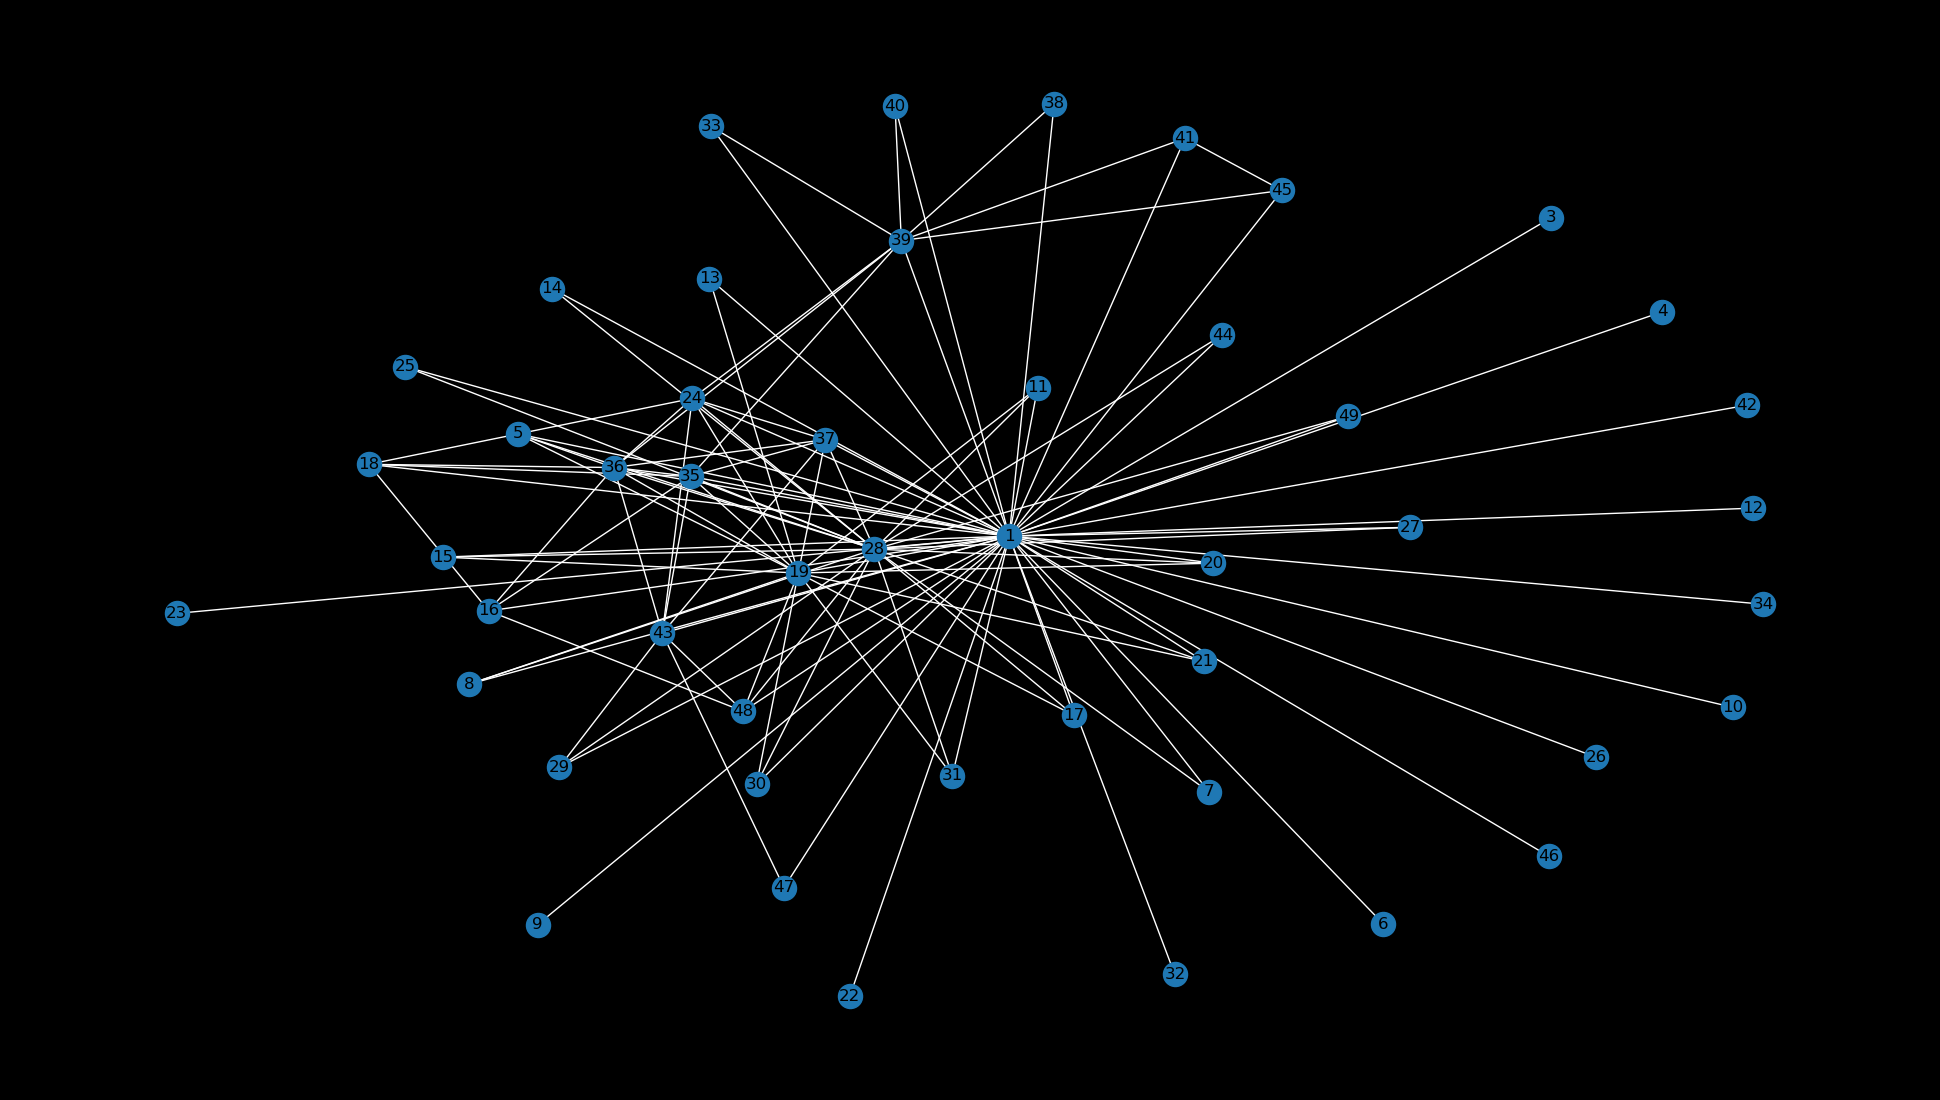

In [23]:
nodes = (1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
         32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49)
edges = [
    # nodes connected to node 1
    (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15),
    (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28),
    (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41),
    (1, 42), (1, 43), (1, 44), (1, 45), (1, 46), (1, 47), (1, 48), (1, 49),
    # nodes connected to node 16
    (16, 18), (16, 35), (16, 36), (16, 48),
    # nodes connected to node 18
    (18, 16), (18, 24), (18, 35), (18, 36),
    # nodes connected to node 19
    (19, 5), (19, 8), (19, 11), (19, 13), (19, 15), (19, 17), (19, 20), (19, 21), (19, 24), (19, 30), (19, 31),
    (19, 35), (19, 36), (19, 37), (19, 48),
    # nodes connected to node 28
    (28, 1), (28, 5), (28, 7), (28, 8), (28, 11), (28, 14), (28, 15), (28, 17), (28, 20), (28, 21), (28, 24), (28, 25),
    (28, 27), (28, 29), (28, 30), (28, 31), (28, 35), (28, 36), (28, 37), (28, 44), (28, 48), (28, 49),
    # nodes connected to node 36
    (36, 5), (36, 24), (36, 35), (36, 37),
    # nodes connected to node 37
    (37, 24), (37, 35), (37, 36),
    # nodes connected to node 39
    (39, 1), (39, 24), (39, 33), (39, 35), (39, 36), (39, 38), (39, 40), (39, 41), (39, 45),
    # nodes connected to node 42
    (42, 1),
    # nodes connected to node 43
    (43, 24), (43, 29), (43, 35), (43, 36), (43, 37), (43, 47), (43, 48),
    # nodes connected to node 45
    (45, 1), (45, 39), (45, 41)]
T = nx.Graph()
T.add_nodes_from(nodes)
T.add_edges_from(edges)

fig = plt.figure(figsize=(19.2,10.8))
nx.draw(T, edge_color='white', with_labels=True)
fig.set_facecolor('black')

In [24]:
bet_cent = nx.betweenness_centrality(T)
bet_cent

{1: 0.7955453504250916,
 3: 0.0,
 4: 0.0,
 5: 6.167129201356769e-05,
 6: 0.0,
 7: 0.0,
 8: 6.167129201356769e-05,
 9: 0.0,
 10: 0.0,
 11: 6.167129201356769e-05,
 12: 0.0,
 13: 0.0,
 14: 0.0,
 15: 6.167129201356769e-05,
 16: 0.0008325624421831637,
 17: 6.167129201356769e-05,
 18: 0.00042399013259327784,
 19: 0.03186093123650941,
 20: 6.167129201356769e-05,
 21: 6.167129201356769e-05,
 22: 0.0,
 23: 0.0,
 24: 0.0024294083961058986,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 28: 0.07965618254702433,
 29: 0.0001321527686005022,
 30: 6.167129201356769e-05,
 31: 6.167129201356769e-05,
 32: 0.0,
 33: 0.0,
 34: 0.0,
 35: 0.003739923351394212,
 36: 0.006707854279547157,
 37: 0.0004636359631734285,
 38: 0.0,
 39: 0.011216466234967623,
 40: 0.0,
 41: 0.0,
 42: 0.0,
 43: 0.00526518655565834,
 44: 0.0,
 45: 0.0,
 46: 0.0,
 47: 0.0,
 48: 0.0010418043258006255,
 49: 0.0}

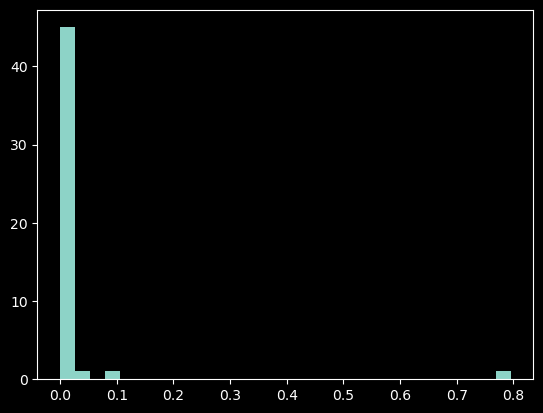

In [25]:
_=plt.hist(bet_cent.values(), bins=30)

## Deep dive - Twitter network

In [26]:
import pickle
with open('ego-twitter.p', 'rb') as f:
    T = pickle.load(f)
len(T.nodes()), len(T.edges())

(23369, 33142)

### Parallel Betweenness Centrality

In [27]:
from mcr.nx import betweenness_centrality_parallel
bet_cent = betweenness_centrality_parallel(T)

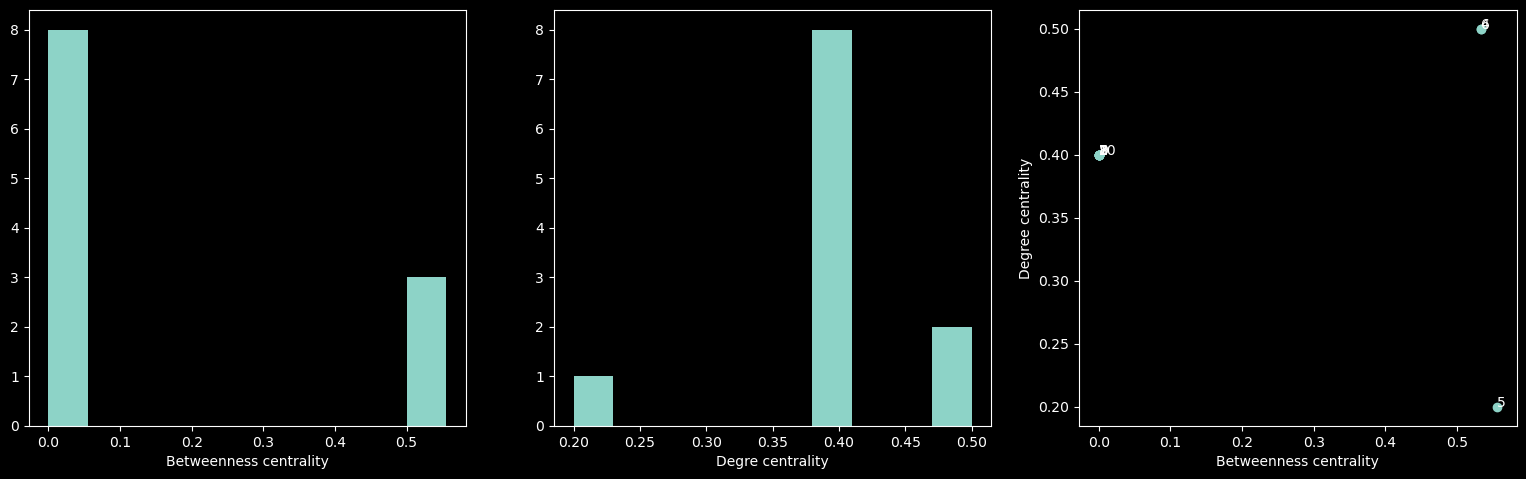

In [28]:
from mcr.nx import plot_betweenness_centrality
plot_betweenness_centrality(G)

### Find nodes with highest degree centrality

In [29]:
from mcr.nx import find_nodes_with_highest_degree_centrality
find_nodes_with_highest_degree_centrality(T)

{11824}

### Find nodes with highest betweenness centrality

In [30]:
from mcr.nx import find_nodes_with_highest_betweenness_centrality
find_nodes_with_highest_betweenness_centrality(T)

{1368}